## Mortgage Loans: Logistic Regression Example

In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import pickle

In [52]:
df = pd.read_csv('../data/loan_data_set.csv')
df.shape

(614, 13)

## Exploratory Data Analysis

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
# declare the list of features
features = ['Credit_History','LoanAmount','Loan_Amount_Term','ApplicantIncome']

In [55]:
# recode missing values
print(df[features].isnull().sum())
for feature in ['LoanAmount','Loan_Amount_Term','ApplicantIncome']:
    df[feature].fillna(value=df[feature].mean(), inplace=True)
print(df[features].isnull().sum())

Credit_History      50
LoanAmount          22
Loan_Amount_Term    14
ApplicantIncome      0
dtype: int64
Credit_History      50
LoanAmount           0
Loan_Amount_Term     0
ApplicantIncome      0
dtype: int64


In [56]:
for feature in ['LoanAmount','Loan_Amount_Term','ApplicantIncome']:
    print(df[feature].agg(['mean', 'median', 'min', 'max']))

mean      146.412162
median    129.000000
min         9.000000
max       700.000000
Name: LoanAmount, dtype: float64
mean      342.0
median    360.0
min        12.0
max       480.0
Name: Loan_Amount_Term, dtype: float64
mean       5403.459283
median     3812.500000
min         150.000000
max       81000.000000
Name: ApplicantIncome, dtype: float64


In [57]:
# credit: missing data
print(df.shape)
print(df['Credit_History'].value_counts(dropna=False))
df.dropna(subset=['Credit_History'], inplace=True)
print(df.shape)

(614, 13)
1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64
(564, 13)


In [58]:
# recode the target variable as numeric
df['Loan_Approval']=np.where(df['Loan_Status']=="Y", 1, 0)
df['Loan_Approval'].value_counts(dropna=False)

1    385
0    179
Name: Loan_Approval, dtype: int64

In [59]:
df['Property_Area'].value_counts()


Semiurban    217
Urban        182
Rural        165
Name: Property_Area, dtype: int64

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder()
property_area_encoder = OneHotEncoder()
property_area_encoded = ordinal_encoder.fit_transform(df[['Property_Area']])
#property_area_1hot = property_area_encoder.fit_transform(

In [61]:
property_area_encoded[:10]

array([[2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.]])

In [62]:
property_area_1hot = property_area_encoder.fit_transform(property_area_encoded)

In [63]:
property_area_1hot.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [64]:
ordinal_encoder.categories_

[array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [65]:
a=pd.DataFrame(property_area_1hot.toarray(), columns=ordinal_encoder.categories_)
a.head()

,Rural,Semiurban,Urban
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [66]:
len(a)

564

In [67]:
len(df)

564

In [68]:
a['Urban'].isna().sum()

Urban    0
dtype: int64

In [69]:
a.columns

MultiIndex([(    'Rural',),
            ('Semiurban',),
            (    'Urban',)],
           )

In [70]:
a.columns = ["Rural","Semiurban","Urban"]

In [71]:
a.columns

Index(['Rural', 'Semiurban', 'Urban'], dtype='object')

In [72]:
a.columns

Index(['Rural', 'Semiurban', 'Urban'], dtype='object')

In [73]:
df.reset_index(inplace=True)
a.reset_index(inplace=True)


b=pd.concat([df,a],axis=1)
b.head(5)

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Approval,index,Rural,Semiurban,Urban
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0.0,0.0,1.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1,1.0,0.0,0.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,2,0.0,0.0,1.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,3,0.0,0.0,1.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,4,0.0,0.0,1.0


In [74]:
# not sure why some one hots are nan!  Dropping them.
#df.drop(df[df['Urban'].isnull()].index,axis=0,inplace=True)
# figured it out after class with Austin, need to reset index before concatting

In [75]:
b.drop(columns=["index"])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Approval,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0.0,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1.0,0.0,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,0.0,0.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,0.0,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,1,1.0,0.0,0.0
560,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,1,1.0,0.0,0.0
561,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,1,0.0,0.0,1.0
562,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,1,0.0,0.0,1.0


In [76]:
b.columns

Index(['index', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loan_Approval', 'index', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')

In [77]:
df = b

In [104]:
df['CombinedIncome']= df['ApplicantIncome']+df['CoapplicantIncome']

In [116]:
features = ['Credit_History','LoanAmount','Loan_Amount_Term','ApplicantIncome', 'Urban','Semiurban','Rural']
#features = ['Credit_History','LoanAmount','Loan_Amount_Term','ApplicantIncome', 'Urban']

## Model Building

In [117]:
# specify X and y
y = df['Loan_Approval']
X = df[features]

In [136]:
X.corr()

,Credit_History,LoanAmount,Loan_Amount_Term,ApplicantIncome,Urban,Semiurban,Rural
Credit_History,1.000000,-0.008301,0.001470,-0.014715,-0.023721,0.042414,-0.020983
LoanAmount,-0.008301,1.000000,0.022808,0.564836,-0.066682,0.000856,0.067610
Loan_Amount_Term,0.001470,0.022808,1.000000,-0.060257,-0.091247,0.048936,0.041433
ApplicantIncome,-0.014715,0.564836,-0.060257,1.000000,-0.006842,-0.012453,0.020348
Urban,-0.023721,-0.066682,-0.091247,-0.006842,1.000000,-0.545845,-0.443874
Semiurban,0.042414,0.000856,0.048936,-0.012453,-0.545845,1.000000,-0.508535
Rural,-0.020983,0.067610,0.041433,0.020348,-0.443874,-0.508535,1.000000


array([[<AxesSubplot:xlabel='Credit_History', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='Urban', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='Semiurban', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='Rural', ylabel='Credit_History'>],
       [<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='Urban', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='Semiurban', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='Rural', ylabel='LoanAmount'>],
       [<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Amount_

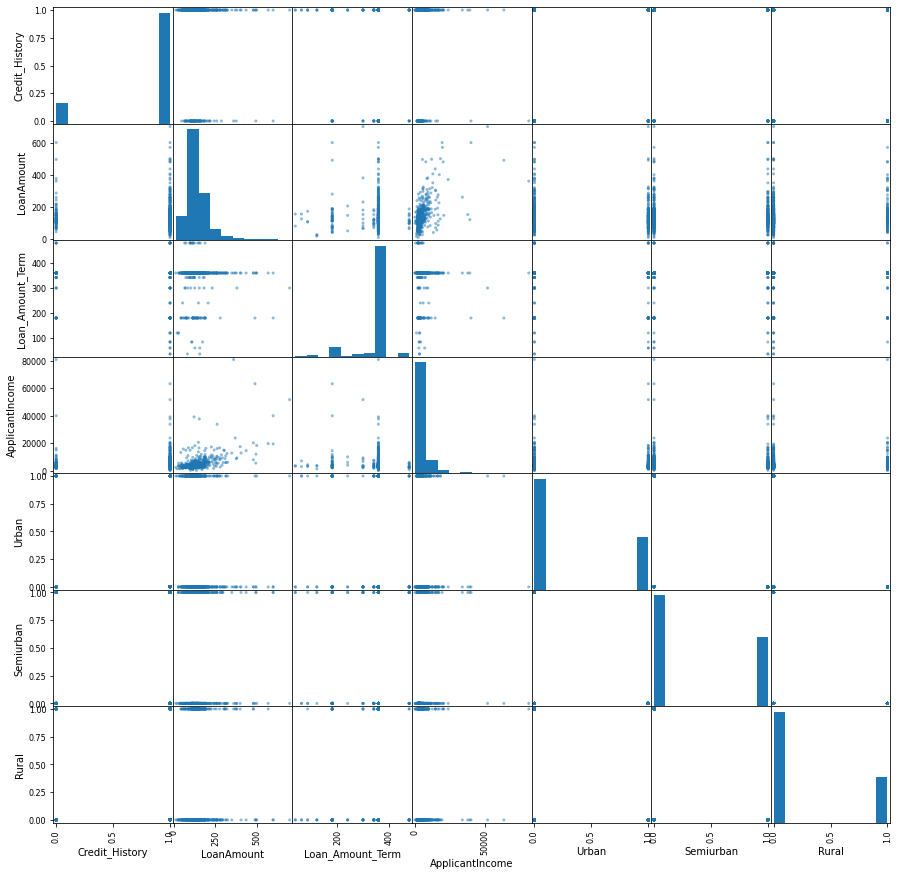

In [139]:
from pandas.plotting import scatter_matrix
attributes = features
scatter_matrix(df[attributes], figsize=(15, 15))
    

In [118]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [119]:
# Fit the model to the training dataset
mymodel = LogisticRegression()
mymodel.fit(X_train, y_train)

LogisticRegression()

In [120]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([[ 2.33696931e+00, -3.27307505e-03, -2.92972623e-03,
         2.89173751e-05, -3.85157528e-01,  1.09836989e+00,
        -5.31546399e-01]])

In [121]:
# Predict the y-values on the testing dataset
y_preds = mymodel.predict(X_test)
y_probs = mymodel.predict_proba(X_test)

## Model Evalution

In [122]:
# Evaluate the model
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        48
           1       0.78      1.00      0.87        93

    accuracy                           0.81       141
   macro avg       0.89      0.72      0.74       141
weighted avg       0.85      0.81      0.78       141



In [123]:
# save your eval report as an html file
report = metrics.classification_report(y_test, y_preds, output_dict=True)
evalreport = pd.DataFrame(report).transpose()
evalreport.to_html('../assets/evalreport.html')
evalreport

,precision,recall,f1-score,support
0,1.000000,0.437500,0.608696,48.000000
1,0.775000,1.000000,0.873239,93.000000
accuracy,0.808511,0.808511,0.808511,0.808511
macro avg,0.887500,0.718750,0.740968,141.000000
weighted avg,0.851596,0.808511,0.783182,141.000000


In [124]:
# true positives, etc.
y_score = mymodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresh=metrics.roc_curve(y_test, y_score)
roc_df=pd.DataFrame(zip(fpr, tpr, thresh), columns=['FPR','TPR','Threshold'])
roc_df.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,1.964025
1,0.000000,0.010753,0.964025
2,0.000000,0.053763,0.940737
3,0.020833,0.053763,0.936437
4,0.020833,0.064516,0.922614


In [125]:
# pickle dataframe

filename = open('roc_df.pkl', 'wb')
pickle.dump(roc_df, filename)
filename.close()

roc_df.to_csv('roc_df.csv', index=False)

0.6143874615666409 33


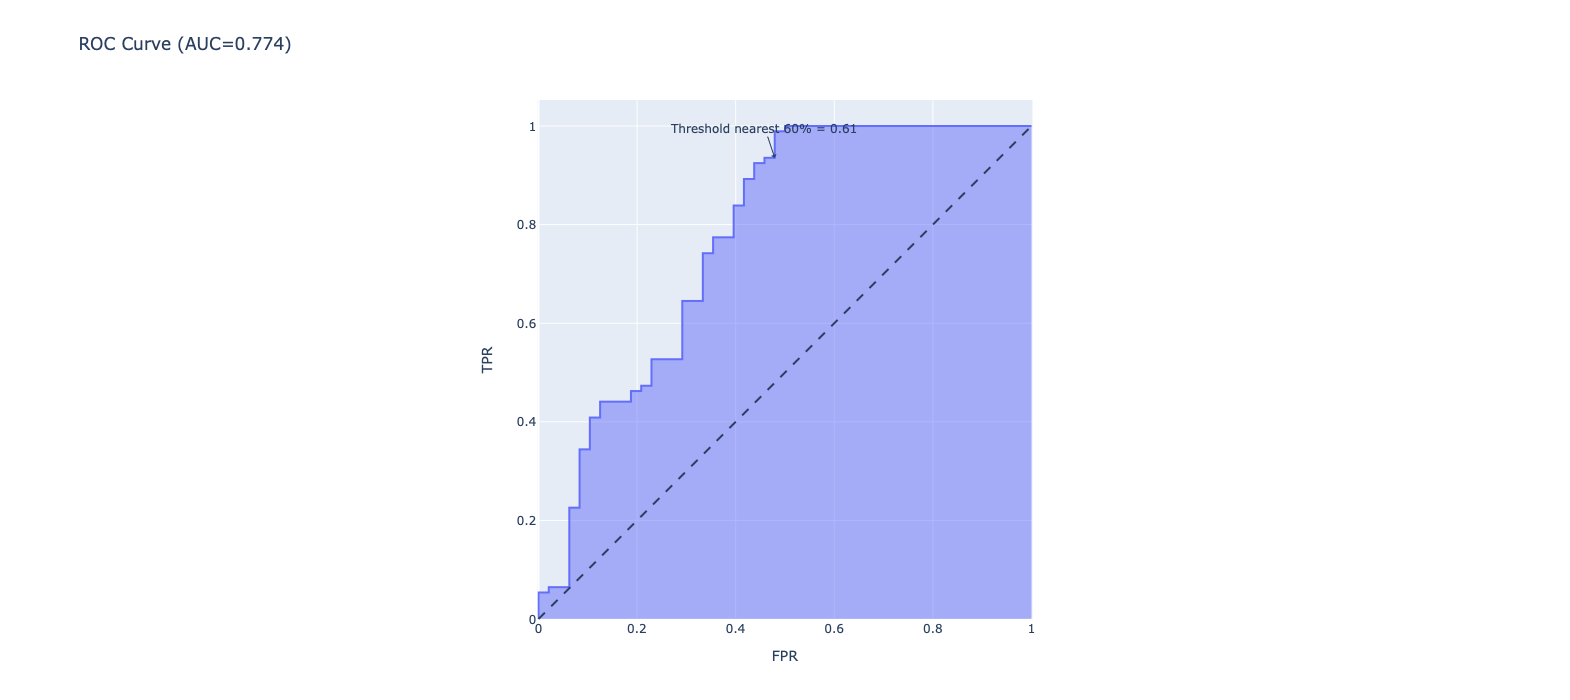

In [126]:
import plotly.express as px

def make_rocauc(i):
    nearest=roc_df.iloc[(roc_df['Threshold']-i).abs().argsort()[:1]]['Threshold'].values[0]
    q=roc_df[roc_df['Threshold']==nearest].index[0]
    print(nearest, q)
    fig = px.area(roc_df, x="FPR", y="TPR",
                  title=f'ROC Curve (AUC={metrics.auc(fpr, tpr):.3f})',
                  hover_data={'Threshold':':.2f',
                              'FPR':':.2f',
                              'TPR':':.2f',
                             },width=800, height=700)

    fig.add_annotation(x=roc_df.iloc[q][0], y=roc_df.iloc[q][1],
            text=f"Threshold nearest {i*100:.0f}% = {roc_df.iloc[q][2]:.2f}",
                showarrow=True,
                arrowhead=1)

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    return fig
make_rocauc(.60)

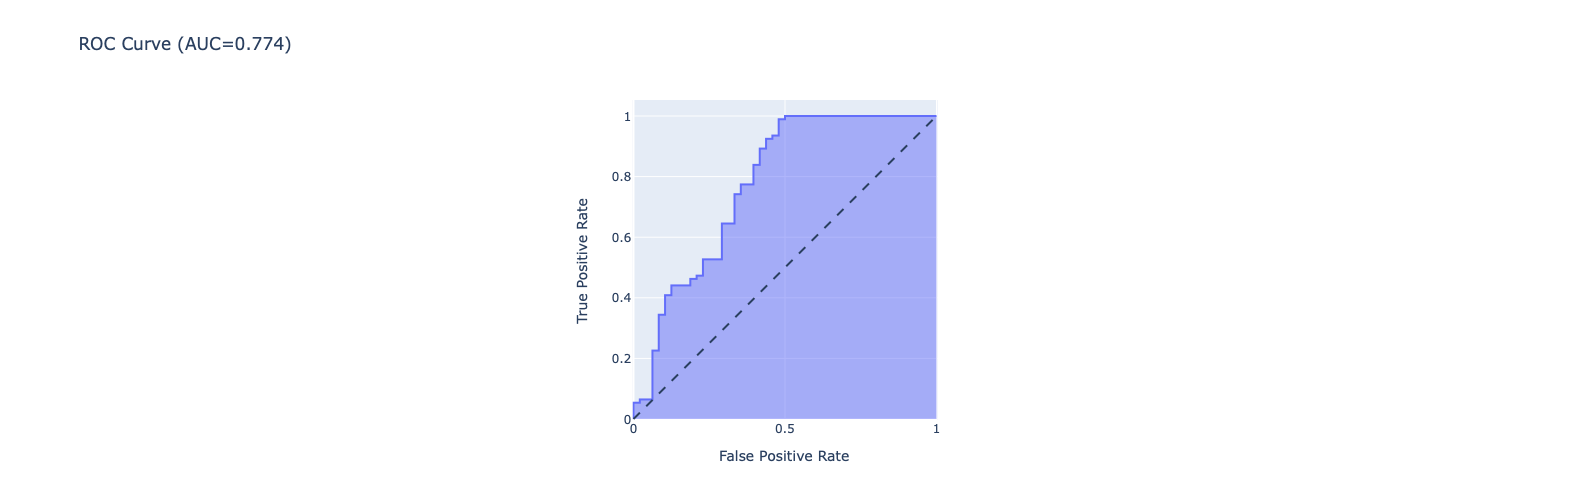

In [127]:
# display with plotly
import plotly.express as px
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={metrics.auc(fpr, tpr):.3f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.write_json('../assets/rocauc.json')
fig.show()

## Make predictions on new data

In [128]:
# check out one row of the test data
X_test.iloc[0]

Credit_History         1.0
LoanAmount            17.0
Loan_Amount_Term     120.0
ApplicantIncome     1299.0
Urban                  1.0
Semiurban              0.0
Rural                  0.0
Name: 14, dtype: float64

In [129]:
# show a prediction & probability for that value
print(mymodel.predict([X_test.iloc[0].values])[0])
print(mymodel.predict_proba([X_test.iloc[0].values]).max())

1
0.8536890487653568


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [130]:
# pickle your model
import pickle
filename = open('loan_approval_logistic_model.pkl', 'wb')
pickle.dump(mymodel, filename)
filename.close()

In [131]:
# read in our pickle file
filename = open('loan_approval_logistic_model.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [132]:
# make predictions on new data
fake1=[[1, 1000, 180, 100, 1, 0, 0]]
fake2=[[1, 300, 360, 4500, 0, 1, 0]]
fake3=[[0, 100, 360, 1000, 0, 0, 1]]

In [133]:
# make predictions
for data in [fake1, fake2, fake3]:
    y = unpickled_model.predict(data)
    func = lambda y: 'approved' if y[0]==1 else 'denied'
    formatted_y = func(y)
    prob=unpickled_model.predict_proba(data).max()*100
    formatted_prob = "{:,.2f}%".format(prob)
    print(y[0]==1)
    print(formatted_y)
    print(formatted_prob)

False
denied
84.08%
True
approved
84.69%
False
denied
84.59%


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-use

In [134]:
# change the threshold
Threshold=50
for data in [fake1, fake2, fake3]:
        rawprob=100*unpickled_model.predict_proba(data)[0][0]
        func = lambda y: 'Denied' if int(rawprob)>Threshold else 'Approved'
        formatted_y = func(y)
        print(rawprob)
        print(formatted_y)

84.07816453295757
Denied
15.309754466510439
Approved
84.59223846196008
Denied


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [135]:
# probability of 'approved'
print(unpickled_model.predict_proba(data)[0][0])
# probability of 'denied'
unpickled_model.predict_proba(data)[0][1]

0.8459223846196008


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



0.15407761538039919